In [1]:
import matplotlib.pyplot as plt
import math
import random
import numpy as np
import pandas as pd


BOITE NOIRES/ORACLE
#Fonction Image de F
#Expression du gradient en Selon la direction X et selon la direction Y


In [2]:
def f(x,y):
    return ((1/2*x*x)+(7/2*y*y))

In [3]:
def gradX(Ak):
    return Ak

In [4]:
def gradY(Bk):
    return (7*Bk)

In [5]:
# Norme du vecteur (x,y)(Norme Euclidien)
def Norme(x,y):
    return(math.sqrt(math.pow(x,2)+math.pow(y,2)))

In [6]:
def PasOPtimal(Xk,Yk):
    return ((math.pow(Xk,2)+(math.pow(Yk,2)*49)/(math.pow(Xk,2)+math.pow(Yk,2)*math.pow(7,3))))

In [34]:
# CompareTable = {
#     "F(x,y)":[],
#     "Norme(gradient(x,y))":[],
#     "sk":[],
#     "Xk":[],
#     "Yk":[]
# }
# 1er [] index 2e [] f(x,y) , 3e [] Norme , 4e [] sk , 5e [] Xk , 6e [] yK

# Stat1 = pd.DataFrame(CompareTable)
# Stat1
def LigneNiveau(c,x):
    if(c<0.5*x*x):
        return False
    else:
        res = math.sqrt((c-0.5*x*x)/3.5)
        return res
    
ligneX = np.linspace(-20,20,20)
def PlotY(c):
    ligneY = np.zeros(20)
    for i in range(len(ligneX)):
        ligneY[i]=LigneNiveau(c,ligneX[i])
    return ligneY
ligne1Y= PlotY(1000)
ligne2Y=PlotY(2000)
ligne3Y= PlotY(3000)

ALGORITHMES DE DESCENTE DE GRADIENT

1\ A pas FIXE
2\ A pas OPTIMAL

1-pas FIXE

In [8]:
def PasFIXE (pas):
    
    # Generer la position de depart de maniere Aleatoire
    
    X0 = random.uniform(1,10)
    Y0 = random.uniform(1,10)
    
    # Avec X, Y une list des differents coordonnes de nos Xk suivant les Axes 
    # precision = 1e-06 
    StatPasFixe =  [[],[],[],[],[],[]]
    listX = []
    listY = []
    precison = 10000
    
    # iteration 
    k = 0
    listX.append(X0)
    listY.append(Y0)
    while(Norme(X0,Y0)<precison):
            X0 = X0 - gradX(X0)*pas
            Y0 = Y0 - gradY(Y0)*pas
            
            StatPasFixe[0].append(k)
            k = k+1
            StatPasFixe[1].append(f(X0,Y0))
            StatPasFixe[2].append(Norme(gradX(X0), gradY(Y0)))
            StatPasFixe[3].append(pas)
            StatPasFixe[4].append(X0)
            StatPasFixe[5].append(Y0)
            #  on ajoute chaque iteration dans nos liste de coordonnes
            
            listX.append(X0)
            listY.append(Y0)
            
    
    CompareTable = {
        "K":StatPasFixe[0],
     "F(x,y)":StatPasFixe[1],
     "Norme(gradient(x,y))":StatPasFixe[2],
     "sk":StatPasFixe[3],
     "Xk":StatPasFixe[4],
     "Yk":StatPasFixe[5]
    }
    print(pd.DataFrame(CompareTable))
    return(listX,listY)

In [9]:
Xk =PasFIXE(0.6)


   K        F(x,y)  Norme(gradient(x,y))   sk        Xk            Yk
0  0  7.257094e+02            100.706186  0.6  1.741446    -14.384447
1  1  7.415980e+03            322.212364  0.6  0.696578     46.030230
2  2  7.593719e+04           1031.077192  0.6  0.278631   -147.296736
3  3  7.775964e+05           3299.446897  0.6  0.111453    471.349556
4  4  7.962587e+06          10558.230064  0.6  0.044581  -1508.318581
5  5  8.153689e+07          33786.336204  0.6  0.017832   4826.619458
6  6  8.349378e+08         108116.275854  0.6  0.007133 -15445.182265


In [10]:
Xk

([4.353614613971573,
  1.741445845588629,
  0.6965783382354516,
  0.27863133529418066,
  0.11145253411767228,
  0.044581013647068915,
  0.017832405458827565,
  0.007132962183531027],
 [4.495139660103568,
  -14.384446912331416,
  46.030230119460526,
  -147.2967363822737,
  471.3495564232759,
  -1508.3185805544827,
  4826.6194577743445,
  -15445.182264877902])

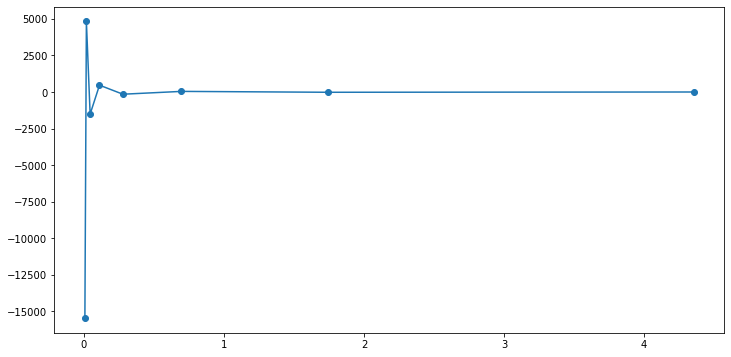

In [11]:
plt.figure(figsize=(12,6))
plt.scatter(Xk[0],Xk[1])
plt.plot(Xk[0],Xk[1])

In [12]:
def PasOPTIMAL ():
    
    # Generer la position de depart de maniere Aleatoire
    
    X0 = random.uniform(0.123,0.999)
    Y0 = random.uniform(1,100)
    
    # Avec X, Y une list des differents coordonnes de nos Xk suivant les Axes 
    # precision = 1e-06 
    
    listX = []
    listY = []
    precison = 10000
    iterMax = 50
    iterCount = 0
    
    # iteration 
    StatPasFixe =  [[],[],[],[],[],[]]
    listX.append(X0)
    listY.append(Y0)
    while(Norme(X0,Y0)<precison and iterCount<iterMax):
        
        X0  = X0 - gradX(X0)*PasOPtimal(X0,Y0)
        Y0 = Y0 - gradY(Y0)*PasOPtimal(X0,Y0)
        
        StatPasFixe[0].append(iterCount)
        StatPasFixe[1].append(f(X0,Y0))
        StatPasFixe[2].append(Norme(gradX(X0), gradY(Y0)))
        StatPasFixe[3].append(PasOPtimal(X0,Y0))
        StatPasFixe[4].append(X0)
        StatPasFixe[5].append(Y0)
            
        #  on ajoute chaque iteration dans nos liste de coordonnes
        listX.append(X0)
        listY.append(Y0)
        iterCount=iterCount+1
        
    CompareTable = {
     "K":StatPasFixe[0],
     "F(x,y)":StatPasFixe[1],
     "Norme(gradient(x,y))":StatPasFixe[2],
     "sk":StatPasFixe[3],
     "Xk":StatPasFixe[4],
     "Yk":StatPasFixe[5]
    }
    print(pd.DataFrame(CompareTable))
    return(listX,listY)

In [13]:
OptimalG = PasOPTIMAL()


     K      F(x,y)  Norme(gradient(x,y))        sk        Xk         Yk
0    0  649.461989             95.353740  0.164871  0.148371 -13.621946
1    1    7.509187             10.248732  0.158208  0.123909   1.463998
2    2    0.048931              0.787249  0.153373  0.104305  -0.111473
3    3    0.004020              0.097433  0.093999  0.088308   0.005881
4    4    0.003212              0.080990  0.027485  0.080007   0.001798
5    5    0.003034              0.078461  0.021133  0.077808   0.001443
6    6    0.002906              0.076646  0.017467  0.076164   0.001226
7    7    0.002804              0.075211  0.015041  0.074833   0.001075
8    8    0.002720              0.074014  0.013302  0.073708   0.000961
9    9    0.002647              0.072982  0.011988  0.072727   0.000871
10  10    0.002584              0.072072  0.010958  0.071855   0.000798
11  11    0.002527              0.071255  0.010126  0.071068   0.000737
12  12    0.002476              0.070511  0.009440  0.070348   0

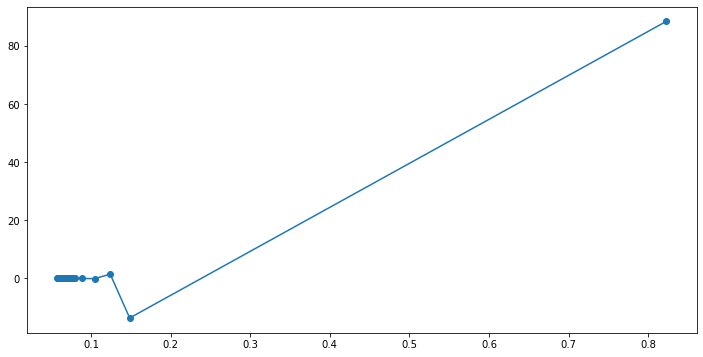

In [14]:
plt.figure(figsize=(12,6))
# plt.scatter(OptimalG[0],OptimalG[1])
plt.plot(OptimalG[0],OptimalG[1],marker='o')
# plt.plot(OptimalG[0],OptimalG[1],marker='o')
# plt.plot(ligneX,ligneY,marker="o",c='red')


AFFICHAGE DU GRAPHE DE NOTRE FONCTION EN F 
#f est une fonction de 3 variables reelle

In [15]:
# axeX = np.linspace(-5,5,122)
# axeX
# axeY = np.linspace(-5,5,122)
# axeY

In [16]:

# axeZ = np.zeros(122)
# axeZ


In [17]:
# for i in range (axeX.size):
#     axeZ[i]=f(axeX[i],axeY[i])
# axeZ  

In [18]:
# from mpl_toolkits.mplot3d import axes3d

In [19]:
# fig = plt.figure(figsize=(12,12))
# ax = fig.gca(projection = '3d')
# ax.plot(axeX,axeY,axeZ,label="f(x,y)")
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')

# plt.tight_layout()
# plt.show()

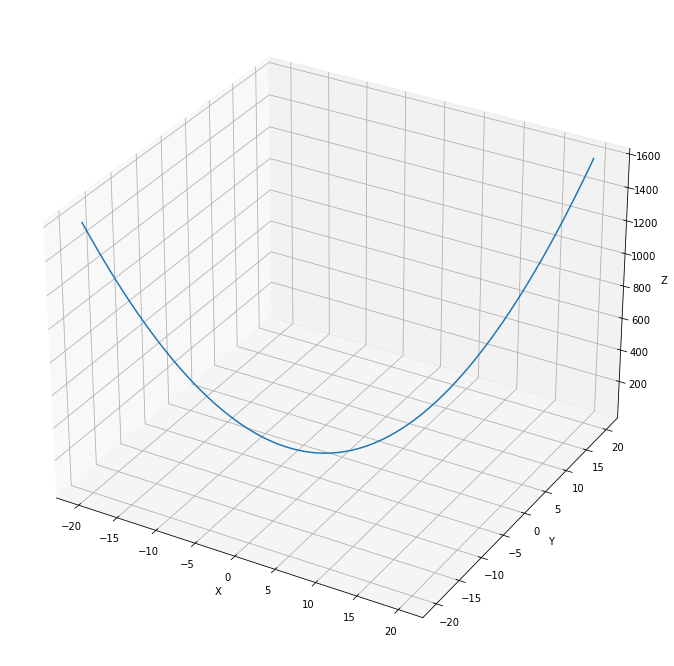

In [27]:
x=np.linspace(-20,20,100)
y=np.linspace(-20,20,100)
# X=np.array([x,y])

z = np.zeros(100)
for i in range (len(x)):
  z[i]=f(x[i],y[i])

fig=plt.figure(figsize=(12,12))
ax=plt.axes(projection='3d')
ax.plot(x,y,z)
# ax.plot(Xk[0],Xk[1],0)
# ax.title(title='Elipse')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

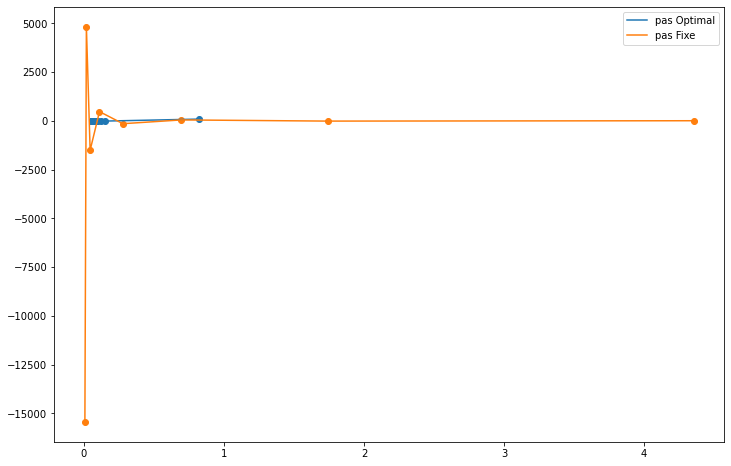

In [21]:
plt.figure(figsize=(12,8))
plt.scatter(OptimalG[0],OptimalG[1])
plt.plot(OptimalG[0],OptimalG[1],label='pas Optimal')
plt.scatter(Xk[0],Xk[1])
plt.plot(Xk[0],Xk[1],label='pas Fixe ')

plt.legend()

In [22]:
# from numpy import linalg as la 


# def grad_x(x):
#   return x

# def grad_y(y):
#   return 7*y

# def normegrad_f(x,y):
#   j=grad_x(x)
#   l=grad_y(y)
#   # norm=math.sqrt(j*j+l*l)
#   p=np.array([j,l])
#   norm=la.norm(p)
#   return norm

# def direction_f(x,y):
#   return(-x,-y)

# def Newton_local():
#     StatPasFixe =  [[],[],[],[],[],[]]

#     i = 0
#     itermax=50
#     x0 =random.uniform(0.123,0.999)
#     y0 = random.uniform(1,100)
#   # y0=random.randint(100)
#     X0=[x0]
#     Y0=[y0]
#     e=1000
#   # X=np.array([x0,y0])
#     while i<itermax: 
#         x0=x0 + direction_f(x0,y0)[0]
#         y0=y0+direction_f(x0,y0)[1]
#         X0.append(x0)
#         Y0.append(y0)
        
#         StatPasFixe[0].append(i)
#         i = i+1
#         StatPasFixe[1].append(f(x0,y0))
#         StatPasFixe[2].append(Norme(gradX(x0), gradY(y0)))
#         StatPasFixe[3].append(1)
#         StatPasFixe[4].append(x0)
#         StatPasFixe[5].append(y0)
#     CompareTable = {
#         "K":StatPasFixe[0],
#      "F(x,y)":StatPasFixe[1],
#      "Norme(gradient(x,y))":StatPasFixe[2],
#      "sk":StatPasFixe[3],
#      "Xk":StatPasFixe[4],
#      "Yk":StatPasFixe[5]
#     }
#     print(pd.DataFrame(CompareTable))
#     return (X0,Y0)


# normegrad_f(1,1)


In [23]:
# pasN=Newton_local()
# plt.figure()
# plt.scatter(pasN[0],pasN[1])
# plt.plot(pasN[0],pasN[1])

In [24]:
def NewtonLocal ():
    
    # Generer la position de depart de maniere Aleatoire
    
    X0 = random.uniform(1,10)
    Y0 = random.uniform(1,10)
    
    # Avec X, Y une list des differents coordonnes de nos Xk suivant les Axes 
    # precision = 1e-06 
    StatPasFixe =  [[],[],[],[],[],[]]
    listX = []
    listY = []
    precison = 10000
    
    # iteration 
    k = 0
    
    listX.append(X0)
    listY.append(Y0)
    while(Norme(X0,Y0)<precison):
            X0 = X0 - (-X0)*1
            Y0 = Y0 -(-Y0)*1
            
            StatPasFixe[0].append(k)
            k = k+1
            StatPasFixe[1].append(f(X0,Y0))
            StatPasFixe[2].append(Norme(gradX(X0), gradY(Y0)))
            StatPasFixe[3].append(1)
            StatPasFixe[4].append(X0)
            StatPasFixe[5].append(Y0)
            #  on ajoute chaque iteration dans nos liste de coordonnes
            
            listX.append(X0)
            listY.append(Y0)
            
    
    CompareTable = {
        "K":StatPasFixe[0],
     "F(x,y)":StatPasFixe[1],
     "Norme(gradient(x,y))":StatPasFixe[2],
     "sk":StatPasFixe[3],
     "Xk":StatPasFixe[4],
     "Yk":StatPasFixe[5]
    }
    print(pd.DataFrame(CompareTable))
    return(listX,listY)

   K        F(x,y)  Norme(gradient(x,y))  sk           Xk           Yk
0  0  8.568778e+02             98.667999   1    19.411834    13.819946
1  1  3.427511e+03            197.335997   1    38.823669    27.639892
2  2  1.371005e+04            394.671995   1    77.647337    55.279785
3  3  5.484018e+04            789.343990   1   155.294674   110.559569
4  4  2.193607e+05           1578.687980   1   310.589348   221.119138
5  5  8.774429e+05           3157.375959   1   621.178697   442.238277
6  6  3.509772e+06           6314.751919   1  1242.357393   884.476553
7  7  1.403909e+07          12629.503838   1  2484.714787  1768.953107
8  8  5.615635e+07          25259.007676   1  4969.429574  3537.906214
9  9  2.246254e+08          50518.015351   1  9938.859148  7075.812427


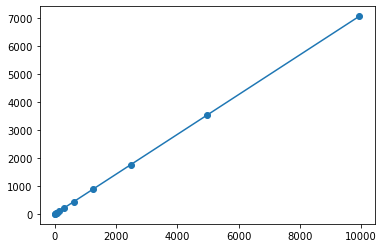

In [25]:
NewL=NewtonLocal()
plt.figure()
plt.scatter(NewL[0],NewL[1])
plt.plot(NewL[0],NewL[1])

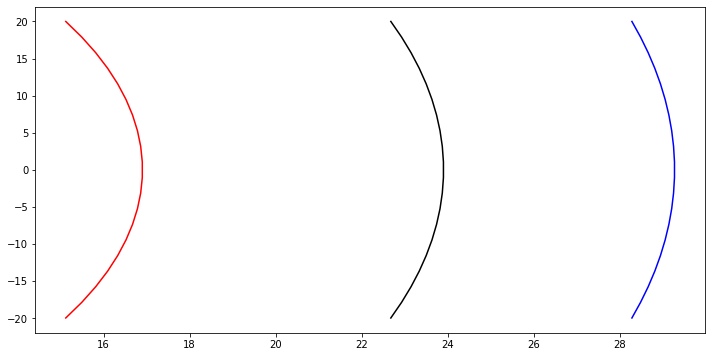

In [35]:
plt.figure(figsize=(12,6))
# plt.scatter(OptimalG[0],OptimalG[1])
# plt.plot(OptimalG[0],OptimalG[1],marker='o')
#plt.plot(OptimalG[0],OptimalG[1],marker='o')
plt.plot(ligne1Y,ligneX,marker="",c='red')
plt.plot(ligne2Y,ligneX,marker="",c='black')
plt.plot(ligne3Y,ligneX,marker="",c='blue')